# Life expectancy and GDP 
## Codecademy project
## February 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [10]:
data= pd.read_csv("all_data.csv")

# rename column
data.rename(columns={'Life expectancy at birth (years)':'life_expectancy'}, inplace=True)




print(data.head())

  Country  Year  life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


In [3]:
data['Country'].value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='life_expectancy'>

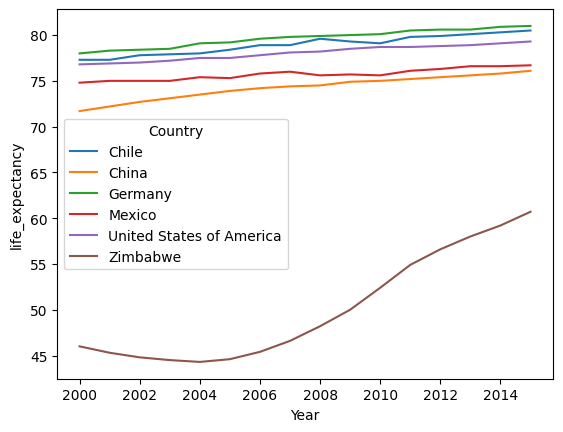

In [25]:
sns.lineplot(data=data, x="Year", y="life_expectancy", hue="Country")


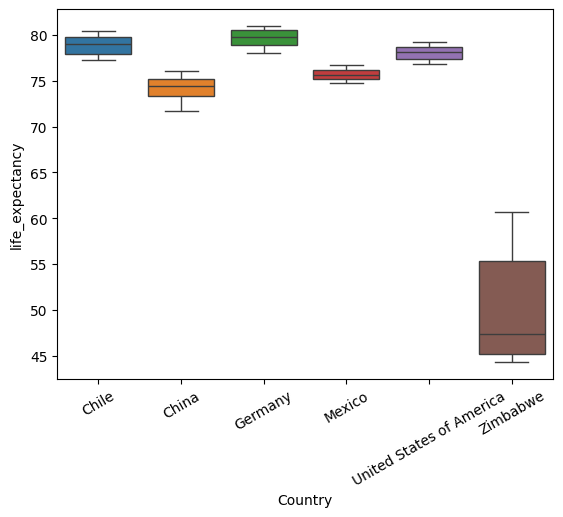

In [28]:
# Create a scatter plot
sns.boxplot(x='Country', y='life_expectancy', data=data, hue='Country')
plt.xticks(rotation=30)
plt.show()


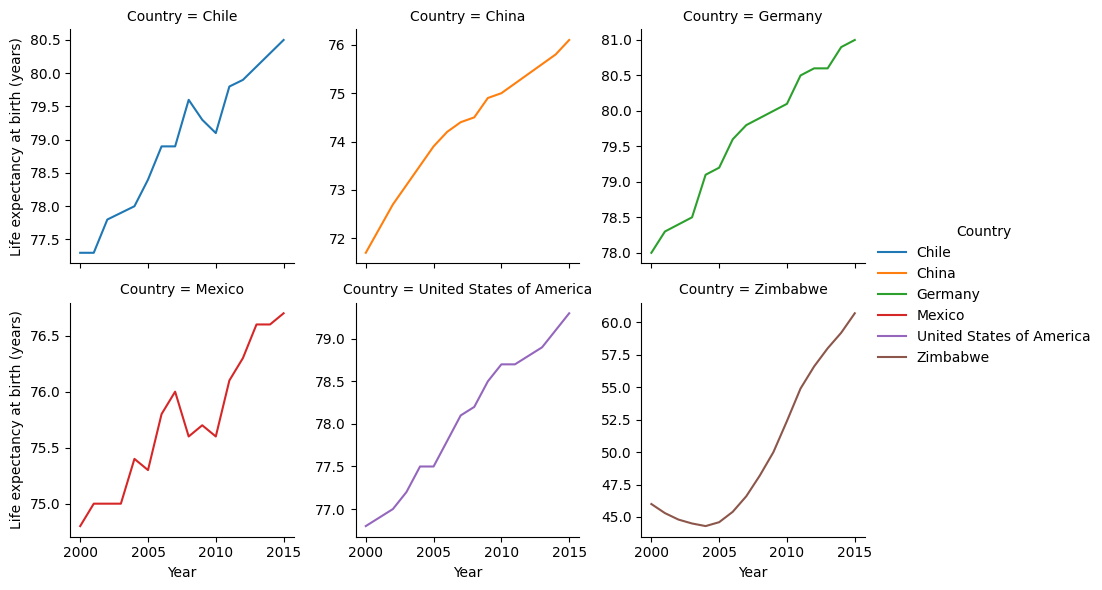

In [38]:
lifex = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

lifex = (lifex.map(sns.lineplot,"Year","life_expectancy")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

lifex;

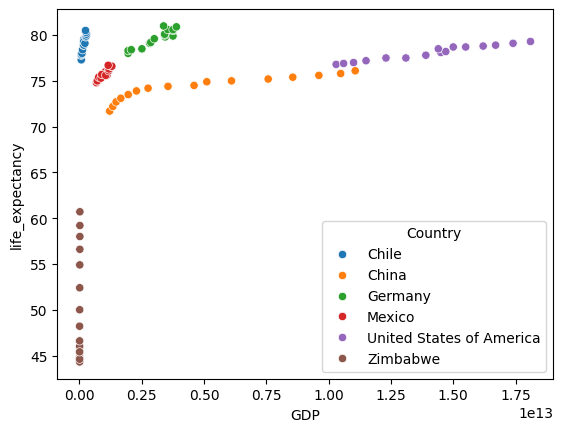

In [32]:
# Create a scatter plot
sns.scatterplot(x='GDP', y='life_expectancy', data=data, hue='Country')
plt.show()




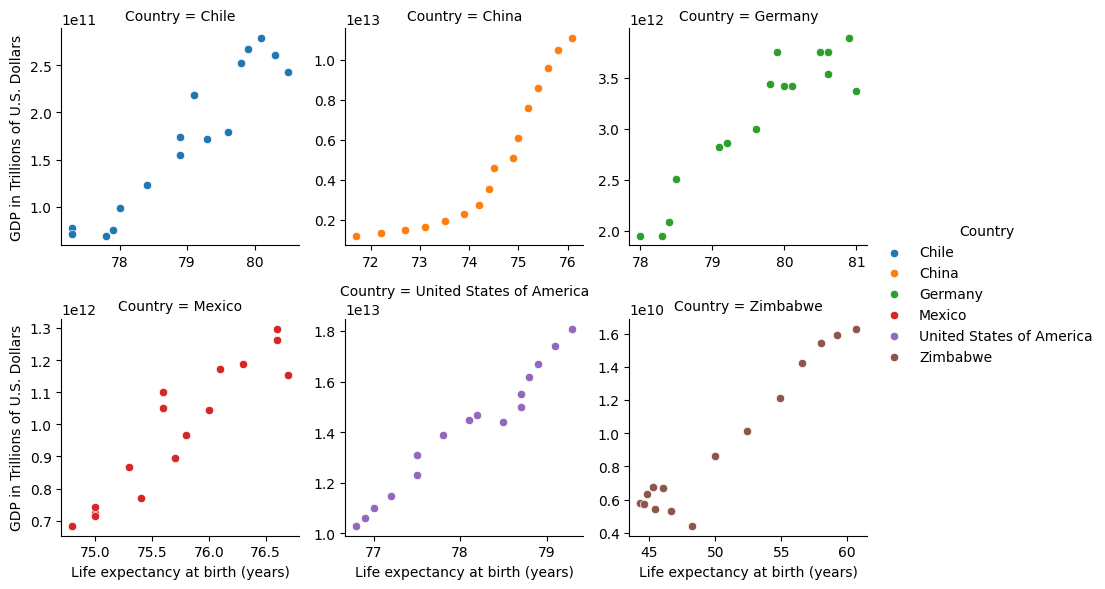

In [37]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


## Conclusion

By analysing this dataset that describes Gross Domestic Product in US Dollars and Life Expectancy over 14 years for the countries Chile, China, Germany, Mexico, USA and Zimbabwe, we have the following insights to report:
- Life expectancy has been steadily rising for all countries over the years, with Zimbabwe showing the greatest improvement of life expectancy (rising from 45 years on average to over 60 years in a span of 14 years).
- Germany and Chile have the highest L.E of the group with values ranging from 76 to 82 years.
-  

### Additional 
#### Regression analysis

In [30]:
# Fit regression model
model = sm.OLS.from_formula('life_expectancy~GDP + Country', data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     270.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.17e-55
Time:                        22:42:54   Log-Likelihood:                -221.14
No. Observations:                  96   AIC:                             456.3
Df Residuals:                      89   BIC:                             474.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In